In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [431]:
df = pd.read_csv('Student_Performance.csv')

In [432]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [433]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [434]:
df.duplicated().sum()

np.int64(127)

In [435]:
df.drop_duplicates(inplace=True)

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


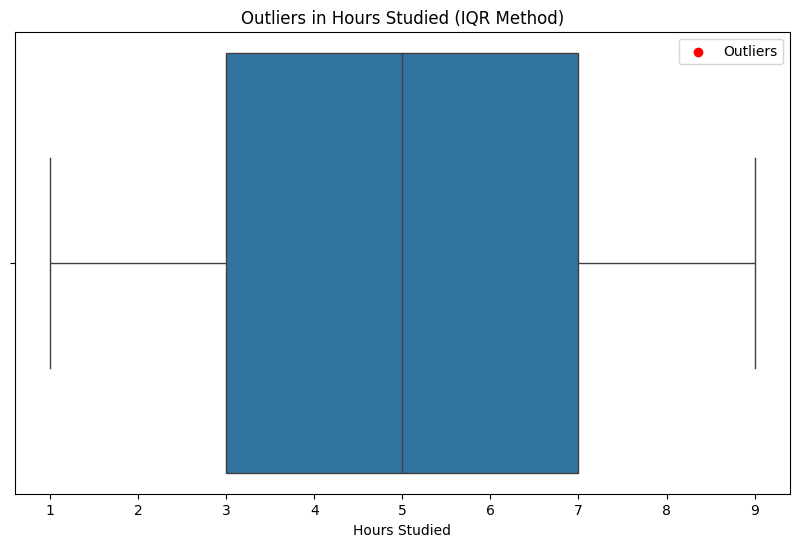

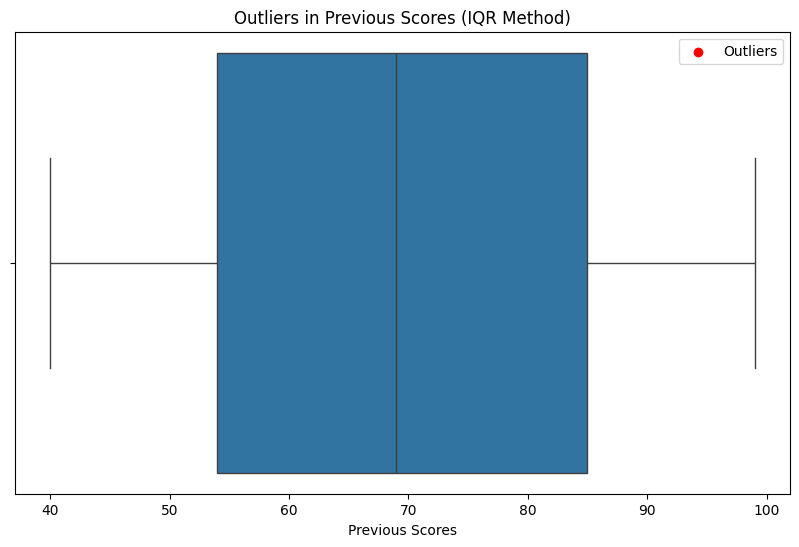

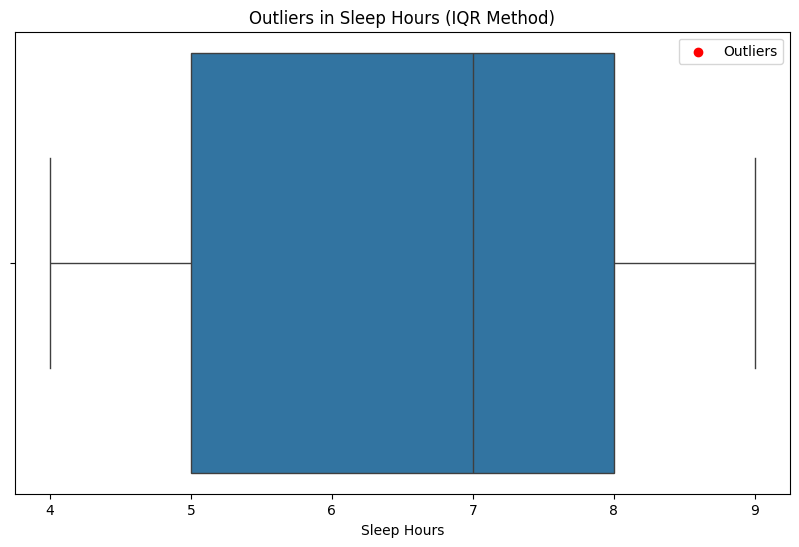

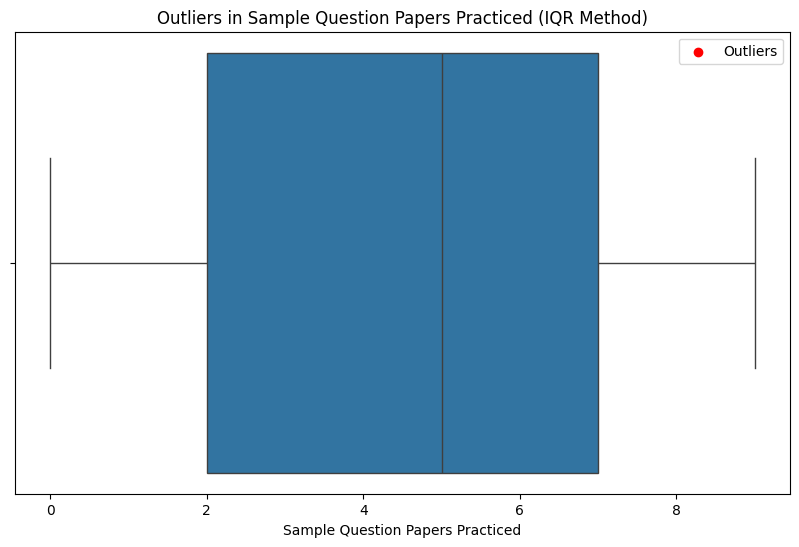

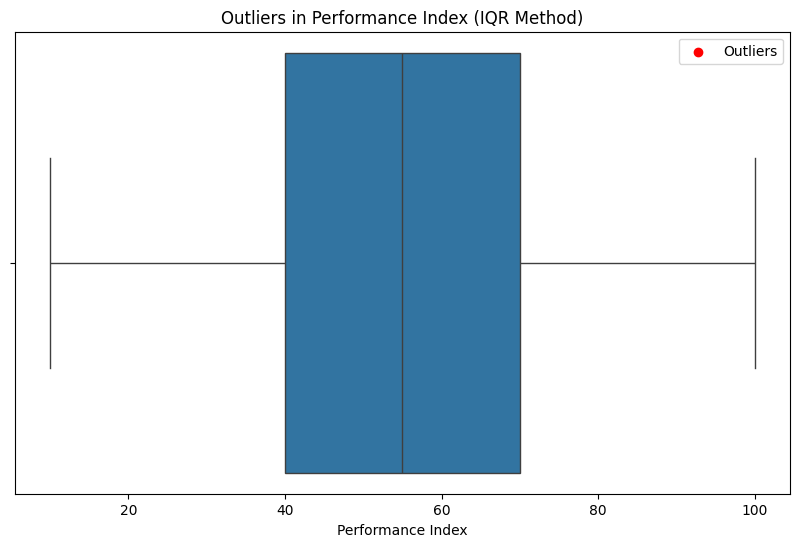

In [409]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

def detect_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.scatter(df[column][outliers], [0] * sum(outliers), color="red", label="Outliers")
    plt.title(f"Outliers in {column} (IQR Method)")
    plt.xlabel(column)
    plt.legend()
    plt.show()

In [410]:
df_model = df.copy()

In [411]:
df_model['Extracurricular Activities'] = df_model['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

df_model.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [412]:
numerical_columns = df.select_dtypes(include=['number']).columns

ranges = df[numerical_columns].agg(['min', 'max']).T
ranges['Range'] = ranges['max'] - ranges['min']
print(ranges)

                                   min    max  Range
Hours Studied                      1.0    9.0    8.0
Previous Scores                   40.0   99.0   59.0
Sleep Hours                        4.0    9.0    5.0
Sample Question Papers Practiced   0.0    9.0    9.0
Performance Index                 10.0  100.0   90.0


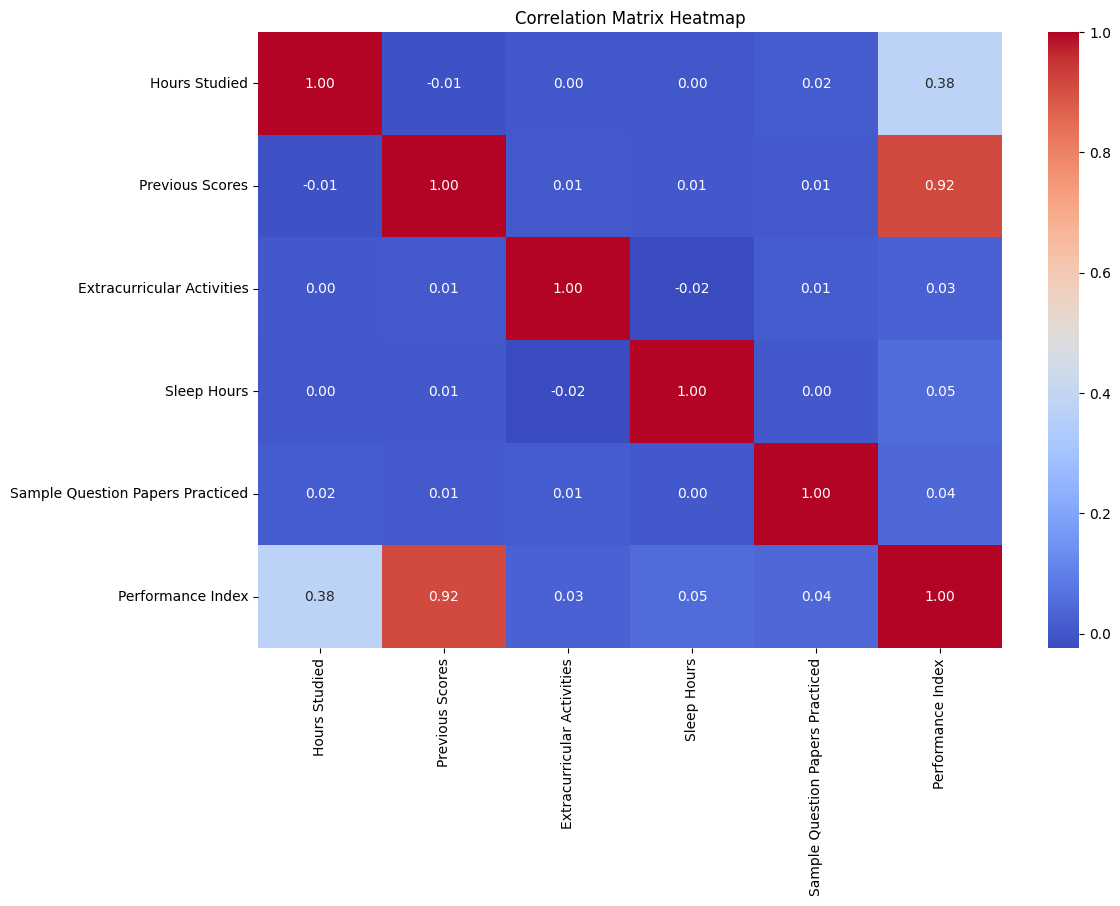

In [413]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df_model.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [414]:
X = df_model[['Previous Scores', 'Hours Studied']].values
Y = df_model[['Performance Index']].values

In [415]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

In [416]:
import numpy as np
import pandas as pd
import scipy.stats

class MultipleLinearRegression:
    def __init__(self):
    
        self.B = None  # Coefficients, including intercept
        self.MSE = None
        self.n = None  # Number of samples
        self.p = None  # Number of predictors including intercept
        self.SSE = None  # Sum of Squared Errors
        self.SSR = None  # Sum of Squares for Regression
        self.SST = None  # Total Sum of Squares
        self.F_stat = None  # F-statistic
        self.r_squared = None  # Coefficient of determination

    def fit(self, X, y):
      
        # 1. Ensure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)

        # 2. Add a column of ones to X for the intercept term
        self.n = X.shape[0]
        self.p = X.shape[1] + 1  # Number of predictors (including intercept)
        X = np.c_[np.ones((self.n, 1)), X]

        # 3. Calculate the coefficients using the Normal Equation
        self.B = np.linalg.inv(X.T @ X) @ X.T @ y

        # 4. Calculate residuals and Mean Squared Error (MSE)
        y_hat = self.predict(X, add_bias=False)
        residuals = y - y_hat  # Residuals
        self.SSE = np.sum(residuals**2)
        self.SST = np.sum((y - np.mean(y))**2)
        self.SSR = self.SST - self.SSE
        self.MSE = self.SSE / (self.n - self.p)  # Divide by (n - p)
        
        # 5. Calculate R-squared
        self.r_squared = 1 - (self.SSE / self.SST)

    def predict(self, X, add_bias=True):
   
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")

        X = np.array(X)
        if add_bias:
            X = np.c_[np.ones((X.shape[0], 1)), X]

        return X @ self.B

    def anova_table(self):
       
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")

        # Degrees of Freedom
        df_regression = self.p - 1  # Degrees of freedom for regression
        df_error = self.n - self.p  # Degrees of freedom for error
        df_total = self.n - 1  # Total degrees of freedom

        # Mean Squares
        MSR = self.SSR / df_regression  # Mean Square for Regression
        MSE = self.SSE / df_error  # Mean Square for Error

        # F-statistic
        self.F_stat = MSR / MSE

        # Assemble the ANOVA table
        anova_data = {
            'Source': ['Regression', 'Error', 'Total'],
            'Sum of Squares': [self.SSR, self.SSE, self.SST],
            'Degrees of Freedom': [df_regression, df_error, df_total],
            'Mean Square': [MSR, MSE, ""],
            'F-Statistic': [self.F_stat, "", ""]
        }

        anova_table = pd.DataFrame(anova_data)
        return anova_table

    def hypothesis_test(self, alpha=0.05):
     
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")

        # Critical value for F-distribution
        df_regression = self.p - 1
        df_error = self.n - self.p
        F_critical = scipy.stats.f.ppf(1 - alpha, df_regression, df_error)

        # Hypothesis conclusion
        if self.F_stat > F_critical:
            conclusion = ("Since F_0 > F_c, we reject the null hypothesis.\n"
                          "Therefore, there's a relationship between the predictors and the target.")
        else:
            conclusion = ("Since F_c > F_0, we don't reject the null hypothesis.\n"
                          "Therefore, there's no relationship between the predictors and the target.")

        # Print the results
        print("="*45)
        print(" Hypothesis Testing Results ")
        print("="*45)
        print(f"{'Null Hypothesis (H_0):':<25} All coefficients except intercept are 0")
        print(f"{'Alternative Hypothesis (H_a):':<25} At least one coefficient ≠ 0")
        print("-"*45)
        print(f"{'F-statistic (F_0):':<25} {self.F_stat:.4f}")
        print(f"{'Critical value (F_c):':<25} {F_critical:.4f}")
        print("-"*45)
        print(f"{conclusion}")
        print("="*45)

    def interval_estimation(self, alpha=0.05, sigma=None):
    
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")

        # Critical value for T-distribution (default)
        if sigma is None:
            t_critical = scipy.stats.t.ppf(1 - alpha / 2, self.n - self.p)
            use_sigma = np.sqrt(self.MSE)  # Use sample-based standard error
        else:
            z_critical = scipy.stats.norm.ppf(1 - alpha / 2)
            use_sigma = sigma  # Use provided population standard deviation

        # Confidence intervals
        confidence_intervals = []
        
        # Reconstruct the feature matrix with the intercept term
        X = np.c_[np.ones((self.n, 1)), np.array(X_scaled)]
        
        # Calculate the covariance matrix
        try:
            covariance_matrix = np.linalg.inv(X.T @ X)
        except np.linalg.LinAlgError:
            raise ValueError("The matrix X.T @ X is singular. Check for collinearity or other issues in the dataset.")

        for i in range(self.p):
            standard_error = np.sqrt(use_sigma**2 * covariance_matrix[i, i])
            if sigma is None:
                # Use T-distribution
                lower_bound = self.B[i] - t_critical * standard_error
                upper_bound = self.B[i] + t_critical * standard_error
            else:
                # Use Z-distribution
                lower_bound = self.B[i] - z_critical * standard_error
                upper_bound = self.B[i] + z_critical * standard_error
            confidence_intervals.append((lower_bound, upper_bound))

        return confidence_intervals
    def plot(self, X, y):
        if self.B is None:
            raise ValueError("The model has not been fitted yet.")

        # Ensure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)

        if X.shape[1] != 2:
            raise ValueError("Plotting is only supported for datasets with exactly 2 features.")

        # Generate grid for the regression plane
        x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
        x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

        # Predicted values for the grid
        y_pred_grid = (
            self.B[0] + self.B[1] * x1_grid + self.B[2] * x2_grid
        )  # Plane equation

        # Create 3D scatter plot with regression plane
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X[:, 0], X[:, 1], y, color="blue", label="Data points")
        ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color="red", alpha=0.5, label="Regression plane")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.set_zlabel("Target")
        ax.set_title("Multiple Linear Regression with Regression Plane")
        plt.legend()
        plt.show()

In [417]:
model = MultipleLinearRegression()

# Fit the model
model.fit(X_scaled, Y_scaled)

In [418]:
# Predictions
y_pred_scaled = model.predict(X_scaled)

# Take a random sample (e.g., 20% of the data)
sample_fraction = 0.002  # Change this to the desired fraction
sample_size = int(len(X_scaled) * sample_fraction)

# Sample indices
random_indices = np.random.choice(len(X_scaled), size=sample_size, replace=False)

# Extract the sample for features and target
X_sample = X_scaled[random_indices]
Y_sample = Y_scaled[random_indices]

In [419]:
y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

In [420]:
# Add predictions to the DataFrame
df_model["Predicted Performance Index"] = y_pred

# Display the first few rows
df_model.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Predicted Performance Index
0,7,99,1,9,1,91.0,91.079074
1,4,82,0,4,2,65.0,65.181227
2,8,51,1,7,2,45.0,45.017212
3,5,52,1,5,2,36.0,37.464096
4,7,75,0,8,5,66.0,66.619432


In [421]:
# Retrieve coefficients
weights = model.B
feature_count = len(weights) - 1

In [422]:
# Construct the regression equation
equation = f"y = {weights[0]} "
for i in range(1, feature_count + 1):
    equation += f"+ {weights[i]} * x{i} "
print(f"The best fit equation: {equation}")
print(f"Mean Squared Error: {model.MSE}")
print(f'Coefficient of determination is: {model.r_squared}')



The best fit equation: y = [-4.82144604e-18] + [0.91924682] * x1 + [0.38514574] * x2 
Mean Squared Error: 0.014211773328664303
Coefficient of determination is: 0.9857925450467014


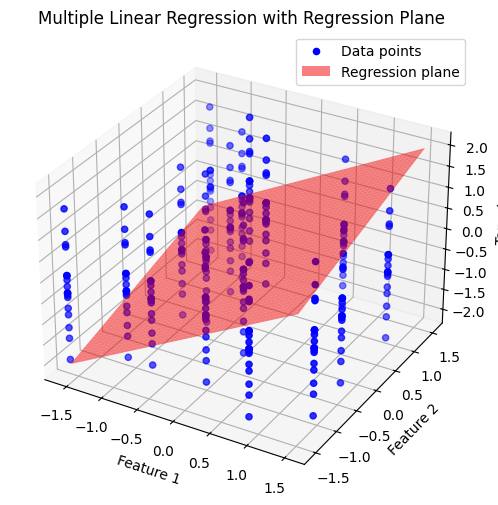

In [423]:
model.plot(X_sample, Y_sample)

In [424]:
model.anova_table()

,Source,Sum of Squares,Degrees of Freedom,Mean Square,F-Statistic
0,Regression,9732.729797,2,4866.364899,342417.852163
1,Error,140.270203,9870,0.014212,
2,Total,9873.000000,9872,,


In [425]:
model.hypothesis_test()

 Hypothesis Testing Results 
Null Hypothesis (H_0):    All coefficients except intercept are 0
Alternative Hypothesis (H_a): At least one coefficient ≠ 0
---------------------------------------------
F-statistic (F_0):        342417.8522
Critical value (F_c):     2.9966
---------------------------------------------
Since F_0 > F_c, we reject the null hypothesis.
Therefore, there's a relationship between the predictors and the target.


In [426]:
B_0_est, B_1_est, B_2_est = model.interval_estimation()
print(f"95% CI for B_0: {B_0_est}")
print(f"95% CI for B_1: {B_1_est}")
print(f"95% CI for B_0: {B_2_est}")


95% CI for B_0: (array([-0.0023518]), array([0.0023518]))
95% CI for B_1: (array([0.91689489]), array([0.92159876]))
95% CI for B_0: (array([0.3827938]), array([0.38749767]))


In [429]:
B_0_est, B_1_est, B_2_est = model.interval_estimation(sigma=X.std())
print(f"95% CI for B_0: {B_0_est}")
print(f"95% CI for B_1: {B_1_est}")
print(f"95% CI for B_1: {B_2_est}")

95% CI for B_0: (array([-0.6809779]), array([0.6809779]))
95% CI for B_1: (array([0.23823011]), array([1.60026353]))
95% CI for B_1: (array([-0.29587097]), array([1.06616245]))
